# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for regression
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
# create data

def create_data(slope):
    N = 50
    x = torch.randn(N,1)
    y = slope*x + torch.randn(N,1)/2
    return x,y


In [24]:
def train_model(x,y):
    
    # build model
    ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )

    # learning rate
    learningRate = .05

    # loss function
    lossfun = nn.MSELoss()

    # optimizer (the flavor of gradient descent to implement)
    optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

    
    # train the model
    numepochs = 500
    losses = torch.zeros(numepochs)

    ## Train the model!
    for epochi in range(numepochs):

      # forward pass
      yHat = ANNreg(x)

      # compute loss
      loss = lossfun(yHat,y)
      losses[epochi] = loss

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    predicted = ANNreg(x)

    return losses, predicted

In [28]:

num_slopes = 21
exp_repeat = 50

slopes = np.linspace(-2, 2, num_slopes)
loss = torch.zeros(num_slopes)
accuracy = torch.zeros(num_slopes)

idx = 0
for slope in slopes:
     
    loss_slope = 0
    correlat = 0
    
    for repeat in range(exp_repeat):

        x, y = create_data(slope)

        l, p = train_model(x,y)

        loss_slope += l[-1]

        p = p.detach()

        cor = np.corrcoef(y.T,p.T)[0,1]

        if np.isnan(cor):
            cor = 0
        correlat += cor

    loss[idx] = loss_slope/exp_repeat
    accuracy[idx] = correlat/exp_repeat

    idx += 1


c:\Users\keving\AppData\Local\miniconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\keving\AppData\Local\miniconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


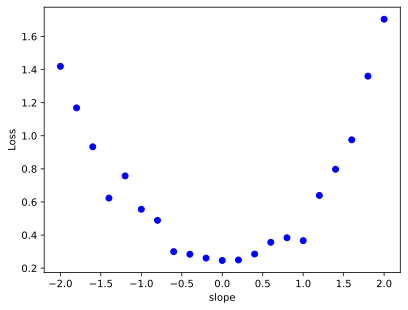

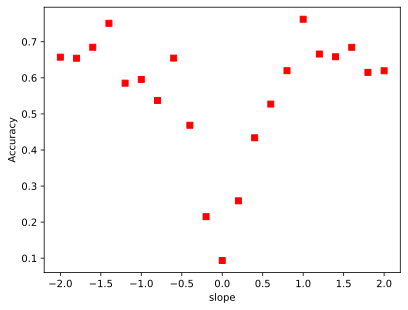

In [29]:
# show the losses

# manually compute losses
# final forward pass

plt.plot(slopes, loss.detach(),'bo')
plt.xlabel('slope')
plt.ylabel('Loss')
plt.show()

plt.plot(slopes, accuracy.detach(),'rs')
plt.xlabel('slope')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# plot the data


# Additional explorations

In [ ]:
# 1) How much data is "enough"? Try different values of N and see how low the loss gets. 
#    Do you still get low loss ("low" is subjective, but let's say loss<.25) with N=10? N=5?
# 
# 2) Does your conclusion above depend on the amount of noise in the data? Try changing the noise level
#    by changing the division ("/2") when creating y as x+randn.
# 
# 3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
#    into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
#    Then count the number of times the model had a loss>.25.